In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

mexico_real_estate = pd.read_csv('Mexico-real-estate-clean dataset.csv', encoding= 'unicode_escape')

mexico_real_estate

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de Mxico,19.560181,-99.233528,150,67965.56
1,house,Nuevo Len,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatn,21.052583,-89.538639,205,105191.37
...,...,...,...,...,...,...
1731,house,Jalisco,20.532264,-103.484418,175,121178.91
1732,house,Morelos,18.928986,-99.180215,100,47417.83
1733,house,Yucatn,21.028404,-89.653006,81,39524.23
1734,house,San Luis Potos,22.118304,-101.032194,360,245050.24


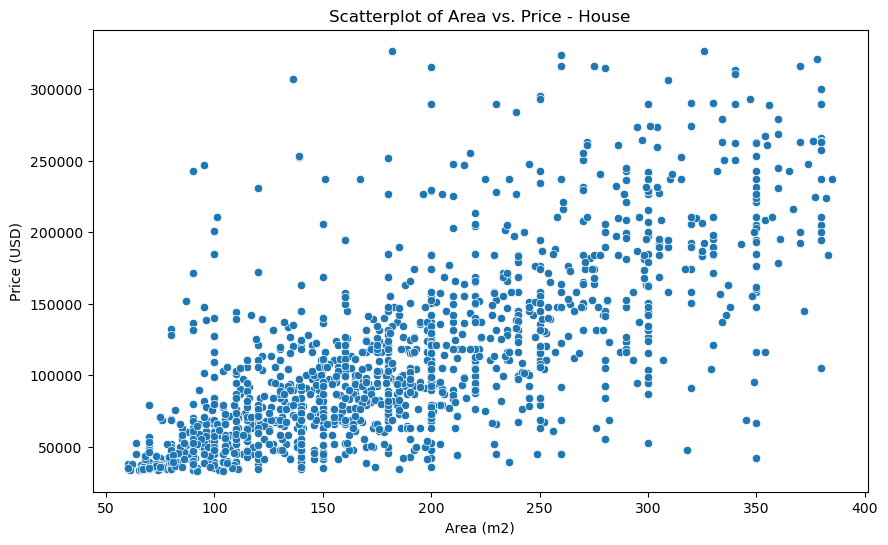

In [2]:
# Filter data for 'House' property type
house_data = mexico_real_estate[mexico_real_estate['property_type'] == 'house']

# Create a scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_m2', y='price_usd', data=house_data)
plt.title('Scatterplot of Area vs. Price - House')
plt.xlabel('Area (m2)')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()

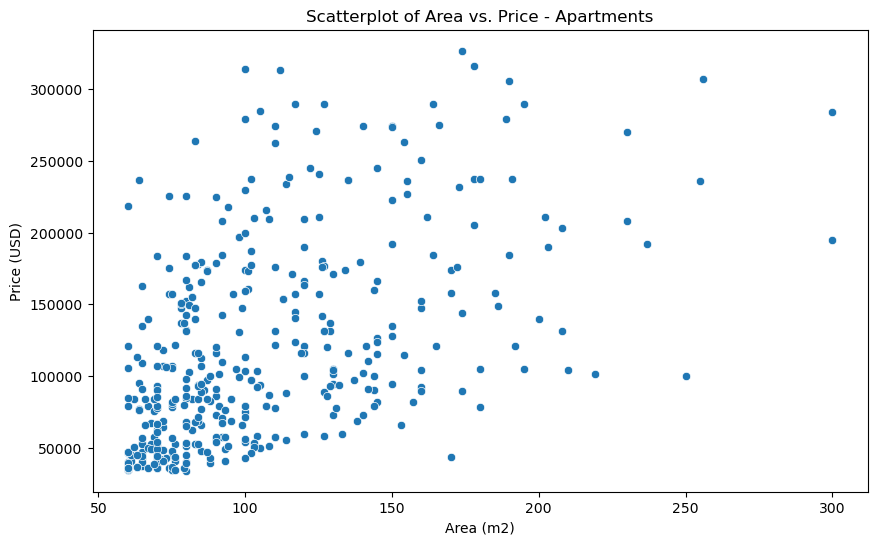

In [3]:
# Filter data for 'House' property type
apartment_data = mexico_real_estate[mexico_real_estate['property_type'] == 'apartment']

# Create a scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_m2', y='price_usd', data=apartment_data)
plt.title('Scatterplot of Area vs. Price - Apartments')
plt.xlabel('Area (m2)')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()

### Normal Distribution View

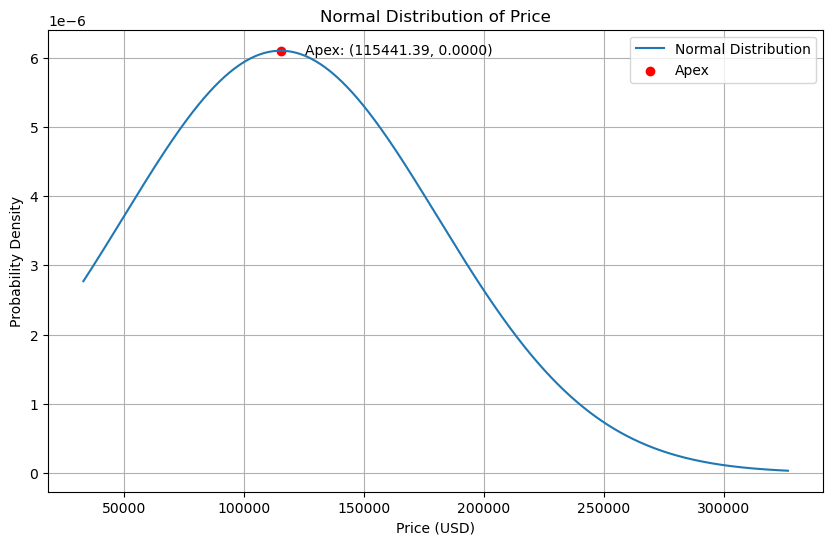

In [4]:
# Mean and std deviation
mean_price = np.mean(mexico_real_estate['price_usd'])
std_dev_price = np.std(mexico_real_estate['price_usd'])

# Data points for x axis
x = np.linspace(min(mexico_real_estate['price_usd']), max(mexico_real_estate['price_usd']), 1000)

# calculate the normal distribution PDF using scipy's norm.pdf
pdf = norm.pdf(x, mean_price, std_dev_price)

# Find the x-coordinate of the apex (peak) of the curve
apex_x = x[np.argmax(pdf)]
apex_y = norm.pdf(apex_x, mean_price, std_dev_price)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution')
plt.scatter(apex_x, apex_y, color='red', label='Apex')
plt.text(apex_x + 10000, apex_y, f'Apex: ({apex_x:.2f}, {apex_y:.4f})', fontsize=10, verticalalignment='center')
plt.title('Normal Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression Model

In [11]:
x = mexico_real_estate[['area_m2']]
y = mexico_real_estate['price_usd']

x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     904.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.75e-160
Time:                        18:26:59   Log-Likelihood:                -21348.
No. Observations:                1736   AIC:                         4.270e+04
Df Residuals:                    1734   BIC:                         4.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.44e+04   2976.843     11.557      0.0

### Logistic Regression Model

In [6]:
# Casting to become a logistic regression model
# Cast price_usd = 1 for high priced (over $115441) and price_usd = 0 for lower priced (under $115441)
price_threshold = 115441

mexico_real_estate['price_usd_class'] = mexico_real_estate['price_usd'].apply(lambda x:1 if x > price_threshold else 0)

In [7]:
x = mexico_real_estate[['area_m2','lat','lon']]
y = mexico_real_estate['price_usd_class']

x = sm.add_constant(x)

# Fit the logistic regression model
logit_model = sm.Logit(y, x).fit()

# Print logistic regression summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.518955
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        price_usd_class   No. Observations:                 1736
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.2336
Time:                        17:57:49   Log-Likelihood:                -900.91
converged:                       True   LL-Null:                       -1175.5
Covariance Type:            nonrobust   LLR p-value:                1.068e-118
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6282      1.264     -3.662      0.000      -7.105      -2.151
area_m2        0.0174      0.

### Geographic Location

In [ ]:
plt.figure(figsize=(10,6))

# plot houses in grey
plt.scatter(mexico_real_estate['lon'],mexico_real_estate['lat'], c='lightgrey', label='House 